In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Loading the Dataset

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


### Separating Features and Labels

In [6]:
X, y = mnist["data"], mnist["target"]

### Splitting the Dataset

In [7]:
X_train, X_test = X[:60000], X[60000:]    
y_train, y_test = y[:60000], y[60000:]

### Converting to numbers

In [8]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

### Creating Binary Labels

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Training a Classifier

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)  
sgd_clf.fit(X_train, y_train_5)          

SGDClassifier(random_state=42)

### Using Cross Validation to evaluate the performance of the model

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.95035 0.96035 0.9604 ]
Average accuracy: 0.9570333333333334


### Confusion Matrix

### Precision,Recall and F1 Score

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
conf_mx = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:")
print(conf_mx)

Confusion Matrix:
[[53892   687]
 [ 1891  3530]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))
print("F1 Score:", f1_score(y_train_5, y_train_pred))

Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343847


### ROC Curve

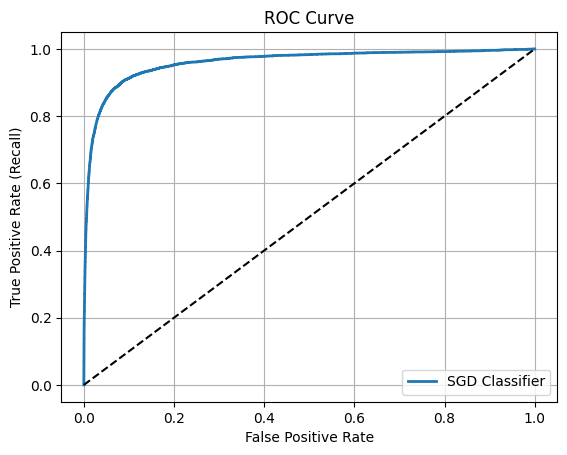

ROC AUC Score: 0.9604938554008616


In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.grid(True)
    if label:
        plt.legend(loc="lower right")

plot_roc_curve(fpr, tpr, label="SGD Classifier")
plt.show()

roc_auc = roc_auc_score(y_train_5, y_scores)
print("ROC AUC Score:", roc_auc)

### Multi-Class Classification 

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train) 

SGDClassifier(random_state=42)

In [16]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print("Decision scores:", some_digit_scores)
print("Predicted label:", np.argmax(some_digit_scores))
print("Class labels:", sgd_clf.classes_)

Decision scores: [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
Predicted label: 3
Class labels: [0 1 2 3 4 5 6 7 8 9]


In [17]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print("OvO Prediction:", ovo_clf.predict([some_digit]))
print("Number of binary classifiers:", len(ovo_clf.estimators_))

OvO Prediction: [5]
Number of binary classifiers: 45


In [18]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
print("Random Forest prediction:", forest_clf.predict([some_digit]))
print("Class probabilities:", forest_clf.predict_proba([some_digit]))

Random Forest prediction: [5]
Class probabilities: [[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


In [19]:
from sklearn.model_selection import cross_val_score
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print("SGD Accuracy (unscaled):", sgd_scores, "Mean:", sgd_scores.mean())

SGD Accuracy (unscaled): [0.87365 0.85835 0.8689 ] Mean: 0.8669666666666668


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
sgd_scaled_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("SGD Accuracy (scaled):", sgd_scaled_scores, "Mean:", sgd_scaled_scores.mean())

SGD Accuracy (scaled): [0.8983 0.891  0.9018] Mean: 0.8970333333333333


In [21]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print("Random Forest Accuracy:", forest_scores, "Mean:", forest_scores.mean())

Random Forest Accuracy: [0.9646  0.96255 0.9666 ] Mean: 0.9645833333333335


### Error Analysis for MultiClassification

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


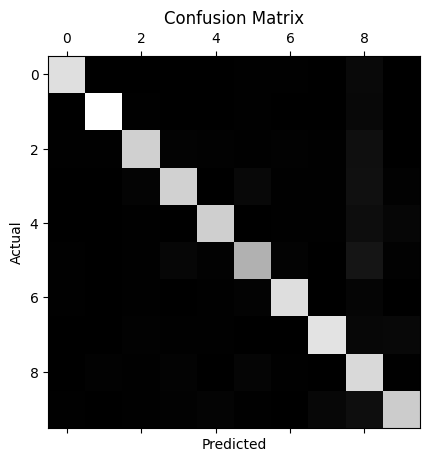

In [25]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Normalize the Confusion Matrix to Compare Error Rates

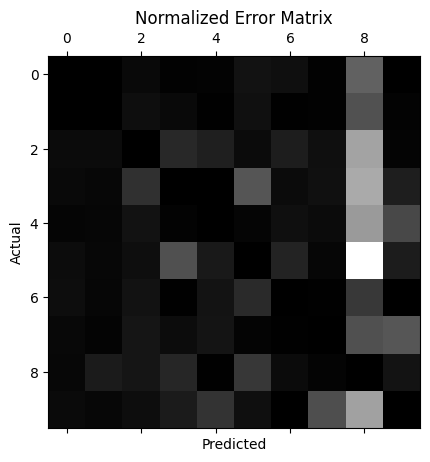

In [26]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Normalized Error Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

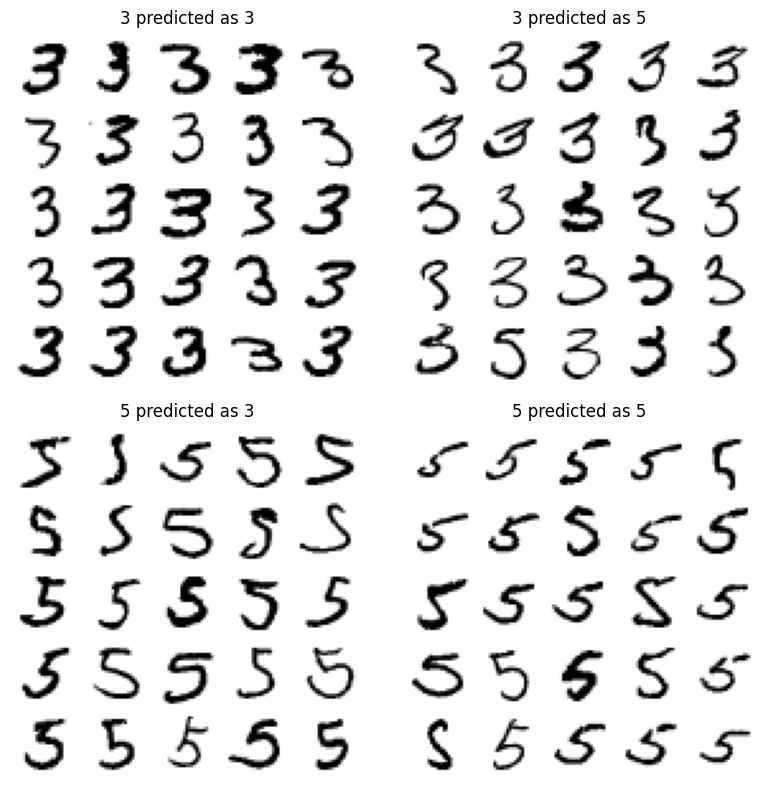

In [28]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size)).swapaxes(1, 2).reshape((n_rows * size, images_per_row * size))
    plt.imshow(image_grid, cmap='binary', **options)
    plt.axis("off")
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5); plt.title("3 predicted as 3")
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5); plt.title("3 predicted as 5")
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5); plt.title("5 predicted as 3")
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5); plt.title("5 predicted as 5")
plt.tight_layout()
plt.show()

### Multilabel Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [30]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

### Multioutput Classification

In [32]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1 = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print("Macro-averaged F1 Score (Multilabel):", f1)

Macro-averaged F1 Score (Multilabel): 0.9764102655606048


In [11]:
import joblib
joblib.dump(sgd_clf, "mnist_sgd_model.pkl")  

['mnist_sgd_model.pkl']